In [50]:
import os
import shutil
import random
import glob
import numpy as np

In [2]:
ls

 dogs-vs-cats/  'Train,Test,Val Splitting.ipynb'


In [3]:
os.chdir('dogs-vs-cats')

In [4]:
pwd

'/home/vips/DeepLizard/dogs-vs-cats'

In [7]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat.*'),500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('dog.*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('cat.*'),100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog.*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('cat.*'),50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog.*'),50):
        shutil.move(c,'test/dog')


In [10]:
os.chdir('../')

In [14]:
os.chdir('/home/vips/DeepLizard')

In [15]:
pwd

'/home/vips/DeepLizard'

In [16]:
train_path = 'dogs-vs-cats/train'
valid_path = 'dogs-vs-cats/valid'
test_path = 'dogs-vs-cats/test'

In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,BatchNormalization,MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import itertools
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [25]:
assert train_batches.n==1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [26]:
imgs ,labels = next(train_batches)

In [27]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

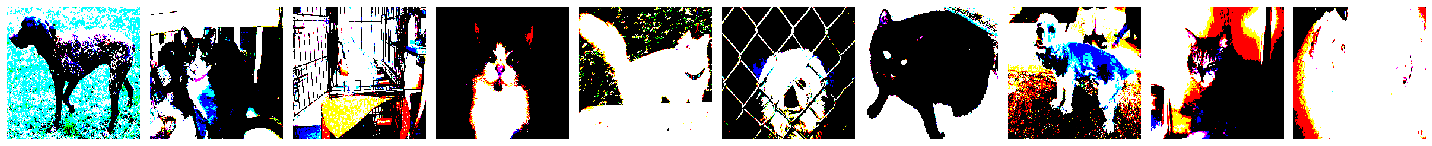

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [28]:
plotImages(imgs)
print(labels)

In [34]:
model = Sequential([
    Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2),strides = 2),
    Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same'),
    MaxPool2D(pool_size = (2,2),strides = 2),
    Flatten(),
    Dense(units =2,activation = 'softmax')
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [36]:
model.compile(optimizer=Adam(learning_rate = 0.0001),loss='categorical_crossentropy',metrics =['accuracy'] )

In [37]:
model.fit(x = train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
 - 47s - loss: 12.8275 - accuracy: 0.5610 - val_loss: 6.7794 - val_accuracy: 0.6100
Epoch 2/10
 - 56s - loss: 2.7875 - accuracy: 0.7540 - val_loss: 5.2859 - val_accuracy: 0.5850
Epoch 3/10
 - 63s - loss: 0.6670 - accuracy: 0.8910 - val_loss: 3.0101 - val_accuracy: 0.6000
Epoch 4/10
 - 104s - loss: 0.2299 - accuracy: 0.9440 - val_loss: 2.2271 - val_accuracy: 0.5550
Epoch 5/10
 - 100s - loss: 0.0850 - accuracy: 0.9770 - val_loss: 5.4810 - val_accuracy: 0.6050
Epoch 6/10
 - 41s - loss: 0.0093 - accuracy: 0.9950 - val_loss: 5.8841 - val_accuracy: 0.6400
Epoch 7/10
 - 40s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.5100 - val_accuracy: 0.6200
Epoch 8/10
 - 39s - loss: 6.4808e-04 - accuracy: 1.0000 - val_loss: 2.9005 - val_accuracy: 0.6350
Epoch 9/10
 - 40s - loss: 5.2505e-04 - accuracy: 1.0000 - val_loss: 4.5772 - val_accuracy: 0.6300
Epoch 10/10
 - 40s - loss: 4.4196e-04 - accuracy: 1.0000 - val_loss: 4.2944 - val_accuracy: 0.6300


In [38]:
from keras.models import save_model

In [43]:
model.save('My_model.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

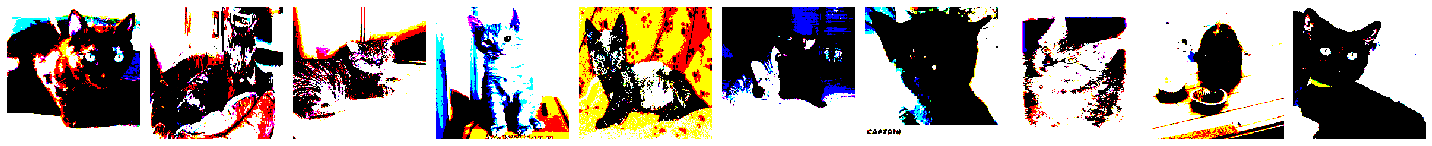

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [45]:
test_img,test_labels = next(test_batches)
plotImages(test_img)
print(test_labels)

In [46]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
prediction = model.predict(x = test_batches,verbose = 0)

In [63]:
#np.round(prediction)
test_img_path = 'dogs-vs-cats/test_img'
test_img_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory='dogs-vs-cats/test_img',target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 0 images belonging to 2 classes.


In [64]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 100 images belonging to 2 classes.


In [66]:
test_path2 = 'dogs-vs-cats/test_img'
test_batches2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path2,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 0 images belonging to 2 classes.
